In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("creditcard.csv")

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.shape

(284807, 31)

In [6]:
data=data.sample(frac=0.1,random_state=1)
data.shape

(28481, 31)

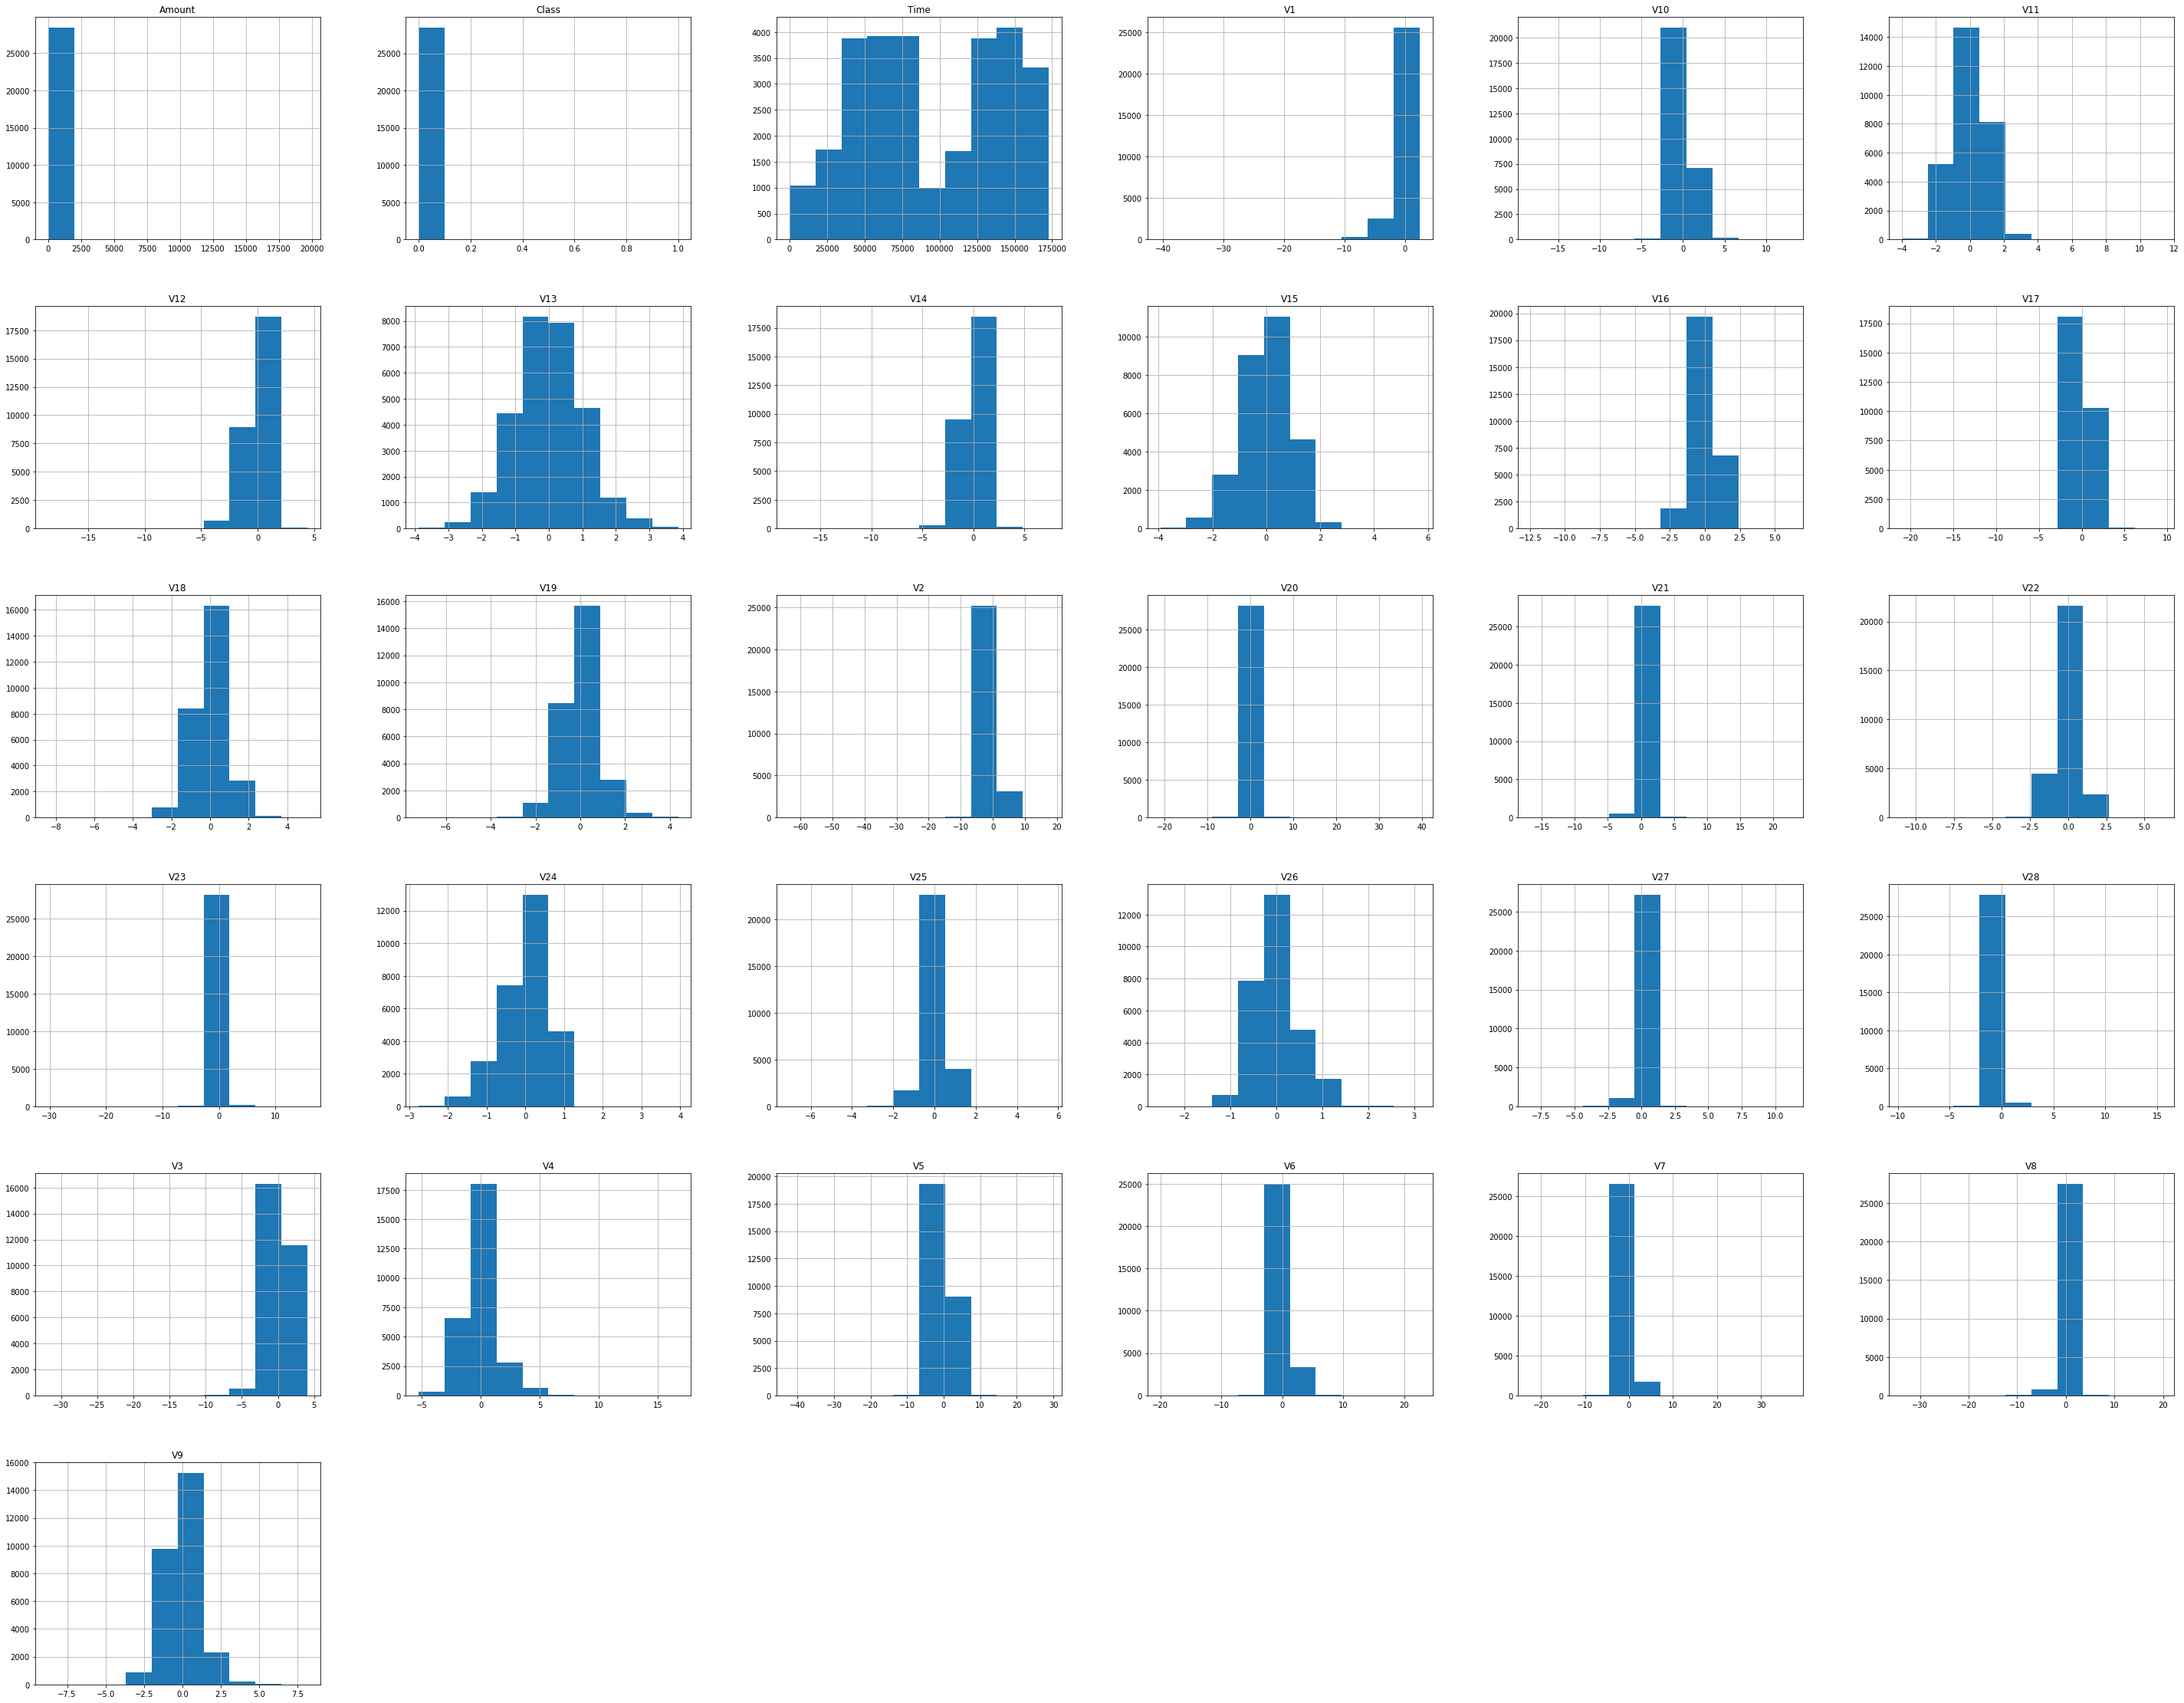

In [7]:
data.hist(figsize=(50,40))
plt.show()

In [8]:
fraud=data[data['Class']==1]
fraud.shape

(49, 31)

In [9]:
valid=data[data['Class']==0]
valid.shape

(28432, 31)

In [11]:
outlier_fraction=len(fraud)/len(valid)
outlier_fraction

0.0017234102419808666

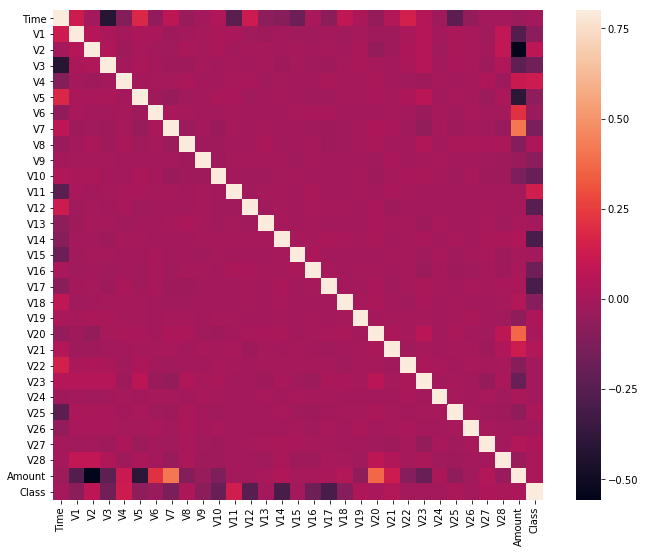

In [20]:
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [67]:
columns= data.columns.tolist()
columns=[c for c in columns if c not in ["Class"]]

X=data[columns]
Y=data["Class"]

In [30]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [72]:
state = 1
classifiers = {
    "IsolationForest":IsolationForest(max_samples=len(X),
                                      contamination=outlier_fraction,
                                      random_state = state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,
    contamination = outlier_fraction)
}

In [76]:
#fit 
n_outliers=len(fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if  clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_predict=clf.decision_function(X)
        y_pred = clf.predict(X)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
n_errors=(y_pred!=Y).sum()
print('{}:{}'.format(clf_name,n_errors))
print(accuracy_score(Y,y_pred))
print(classification_report(Y,y_pred))

Local Outlier Factor:97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

